In [137]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [138]:
"""Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python."""
"""1) Delivery_time -> Predict delivery time using sorting time """

'1) Delivery_time -> Predict delivery time using sorting time '

In [139]:
# importing the data using pandas.
data=pd.read_csv('E:\SLR/delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
...,...,...
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7


In [140]:
# creating a dataframe using pandas.
df=pd.DataFrame(data)
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
...,...,...
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7


In [141]:
# Now, After creating the dataframe the main step is to explore throughout the data.
# this exploration of data is considered as one of the main steps in the data analysis.
# in univaiate data we have done hypothesis testing types to get the desired output.
# now the data which we got is bivariate data with two varaibles , so we have to perform EDA on the data and check the relationship between them

In [142]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot: xlabel='Delivery Time', ylabel='Density'>

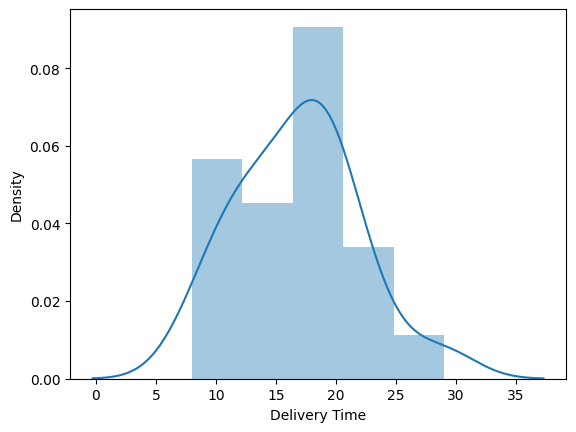

In [143]:
# we have previously used distplot to see that our data is folowing normal distribution or not
sns.distplot(df['Delivery Time'])

<AxesSubplot: xlabel='Sorting Time', ylabel='Density'>

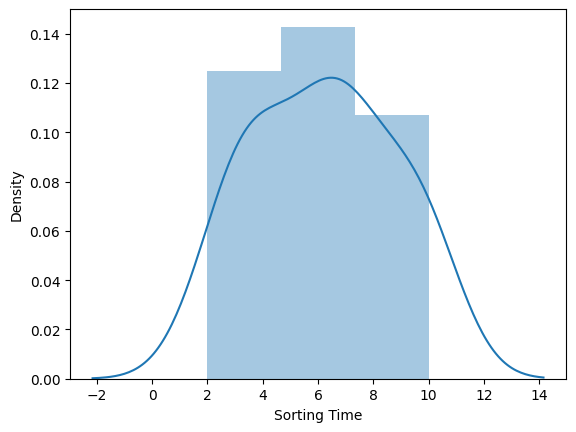

In [144]:
sns.distplot(df['Sorting Time'])

array([[<AxesSubplot: title={'center': 'Delivery Time'}>,
        <AxesSubplot: title={'center': 'Sorting Time'}>]], dtype=object)

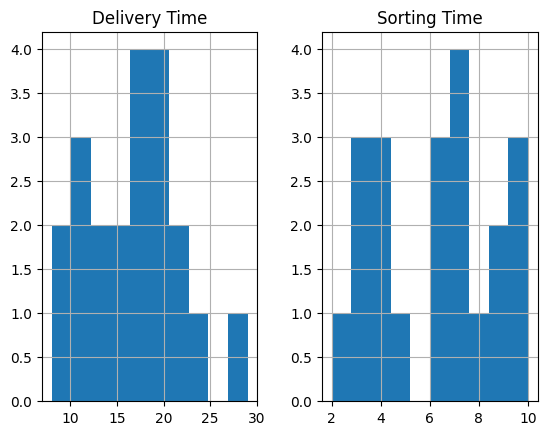

In [145]:
# histogram to check the distribution of data

df.hist()

# we can see that the data is normally distributed and symmetrical with bell shape

<AxesSubplot: >

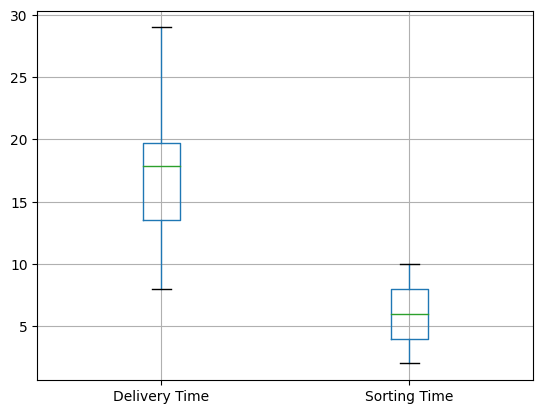

In [146]:
# boxplot will find out the outliers present in the data

df.boxplot()

# we can see  that there are no outliers in the data so we can continue the next eda process

In [147]:
# now we have to check the relation between the two variables

df.corr()

# we can see that there is a strong positive realtionship between Delivery Time and Sorting Time

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot: xlabel='Sorting Time', ylabel='Delivery Time'>

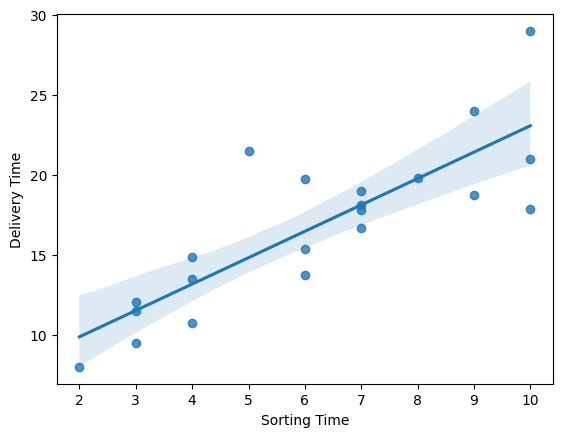

In [148]:
# plotting a regression plot to see where the actual data points lie on the plot
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

In [149]:
# Renaming Columns to apply the simple linear regression model
new_df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
new_df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
...,...,...
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7


In [150]:
# for applyting the simple linear regression model we got many methods
# but here iam going to work this one out with two of my most favourite methods
"""1.Linear Regression using sklearn.linear_model and another is using ORDINARY LEAST SQUARE METHOD both taught by advaith sir in the Excelr Class"""


'1.Linear Regression using sklearn.linear_model and another is using ORDINARY LEAST SQUARE METHOD both taught by advaith sir in the Excelr Class'

In [151]:
x=new_df["sorting_time"]
y=new_df["delivery_time"]

In [152]:
import numpy as np

a=np.array(x)
b=np.array(y)

c=np.c_[a]
c

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [153]:
#fitting the Linear Regression using sklearn.linear_model
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(c,b)
print("intercept =",Lr.intercept_)
print("coefficient",Lr.coef_)

b_pred=Lr.predict(c)

error = y-b_pred
print("error rate",error.sum())

intercept = 6.58273397199706
coefficient [1.6490199]
error rate -5.684341886080802e-14


In [154]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y,b_pred)
print("mean square error is = ",mse)
print("root mean square error is = ",np.sqrt(mse))

mean square error is =  7.793311548584063
root mean square error is =  2.7916503270617654


In [155]:
# giving data for Prediction let it be sorting time 9,12
new_data=pd.Series([9,12])
new_data

0     9
1    12
dtype: int64

In [156]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,9
1,12


In [157]:
Lr.predict(data_pred)

array([21.42391304, 26.37097273])

In [158]:
# Manual prediction for say sorting time 9 and 12 to check whether our prediction is right or wrong
delivery_time9 = (6.582734) + (1.649020)*(9)
print(delivery_time9)
delivery_time12 = (6.582734) + (1.649020)*(12)
print(delivery_time12)

21.423914
26.370973999999997


In [159]:
# now going with the second method that i have learned using the ordinary least square method

In [160]:
model=smf.ols("delivery_time~sorting_time",data=new_df).fit()

In [161]:
# Coefficient parameters i.e intercept and slope
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [162]:
# tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [163]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [164]:
# giving data for Prediction let it be sorting time 9,12
new_data=pd.Series([9,12])
new_data

0     9
1    12
dtype: int64

In [165]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,9
1,12


In [166]:
model.predict(data_pred)

0    21.423913
1    26.370973
dtype: float64

In [167]:
# Manual prediction for say sorting time 9 and 12 to check whether our prediction is right or wrong
delivery_time9 = (6.582734) + (1.649020)*(9)
print(delivery_time9)
delivery_time12 = (6.582734) + (1.649020)*(12)
print(delivery_time12)

21.423914
26.370973999999997


In [168]:
# actually we can get a whole summary of parameters using the ols method
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 19 May 2023   Prob (F-statistic):           3.98e-06
Time:                        17:18:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""